## Air Quality Dashboard
This notebook shows how to use IPython Widgets to display the air quality using Grove Sensors.

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation
import collect_air_data
import time
import pandas as pd

air_data = collect_air_data.collect_air_object()

In [23]:
pms5003_data = air_data.pms5003.read()
print(pms5003_data.pm_per_1l_air(0.3))
print(pms5003_data.pm_per_1l_air(0.5))
print(pms5003_data.pm_per_1l_air(1.0))
print(pms5003_data.pm_per_1l_air(2.5))
print(pms5003_data.pm_per_1l_air(5.0))
print(pms5003_data.pm_per_1l_air(10.0))

378
55
36
6
2
2


In [ ]:
air_data.pms5003.read()

In [24]:
print(air_data.gas_gmxxxb.getGM102B_raw())
print(air_data.gas_gmxxxb.getGM302B_raw())
print(air_data.gas_gmxxxb.getGM502B_raw())
print(air_data.gas_gmxxxb.getGM702B_raw())

509
396
312
298


In [25]:
while True:
    if air_data.bme_680.get_sensor_data():
        output = '{0:.2f} C,{1:.2f} hPa,{2:.2f} %RH'.format(
            air_data.bme_680.data.temperature,
            air_data.bme_680.data.pressure,
            air_data.bme_680.data.humidity)
        #Only print gas data if the heater is stable
        if air_data.bme_680.data.heat_stable:
            print('{0},{1} Ohms'.format(
                output,
                air_data.bme_680.data.gas_resistance))
            break
        else:
            print(output)
    time.sleep(1)

23.45 C,1018.79 hPa,51.37 %RH,7427.14308564865 Ohms


In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
import random
import threading
from IPython.display import display, clear_output
import time
import math
from redpitaya.overlay.mercury import mercury as FPGA

import numpy as np

from datetime import datetime, date
import pandas as pd

overlay = FPGA()
ANALOG_TEMP = FPGA.analog_in(1) # define which pin will be used for temperature sensor

In [26]:
air_data.analog_temp()

23.65754409827133

In [27]:
air_data.analog_voc_ratio()

0.30569998814593474

In [28]:
air_data.analog_alcohol_ratio()

2.101614402501262

In [ ]:
air_data.reset_initial_values()

In [ ]:
air_data.voc_air_ref

In [ ]:
air_data.alcohol_air_ref

In [7]:
bme_680_latest = air_data.bme_680.get_sensor_data()
bme_680_latest.gas_resistance

3168.54243920516

<IPython.core.display.Javascript object>


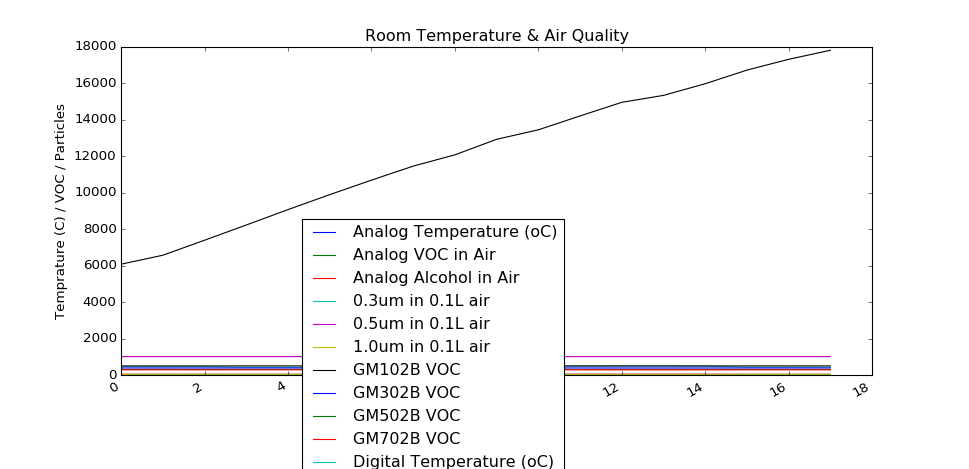

In [37]:
df = pd.DataFrame() #Create an empty data frame to append to later
#timestamp = df.size
def animate(i):
    global df
    clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
    clean_data_table['Analog Temperature (oC)'] = [air_data.analog_temp()]
    clean_data_table['Analog VOC in Air'] = [air_data.analog_voc_ratio()]
    clean_data_table['Analog Alcohol in Air'] = [air_data.analog_alcohol_ratio()]
    pms5003_data = air_data.pms5003.read()
    clean_data_table['0.3um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.3)]
    clean_data_table['0.5um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.5)]
    clean_data_table['1.0um in 0.1L air'] = [pms5003_data.pm_per_1l_air(1.0)]
    clean_data_table['GM102B VOC'] = [air_data.gas_gmxxxb.getGM102B_raw()]
    clean_data_table['GM302B VOC'] = [air_data.gas_gmxxxb.getGM302B_raw()]
    clean_data_table['GM502B VOC'] = [air_data.gas_gmxxxb.getGM502B_raw()]
    clean_data_table['GM702B VOC'] = [air_data.gas_gmxxxb.getGM702B_raw()]
    bme_680_latest = air_data.bme_680.get_sensor_data()
    clean_data_table['Digital Temperature (oC)'] = [bme_680_latest.temperature]
    clean_data_table['Air Pressure (hPa)'] = [bme_680_latest.pressure]
    clean_data_table['Humidity %'] = [bme_680_latest.humidity]
    clean_data_table['BM680 Heater Stable'] = [bme_680_latest.heat_stable]
    if bme_680_latest.heat_stable:
        clean_data_table['BM680 VOC'] = [bme_680_latest.gas_resistance]
    timestamp = df.size
    timestamp = 2
    df = df.append(clean_data_table, ignore_index = True)
    df.index.name = 'timestamp'
    
    #x = df['Date']
    x = df.index
    y1 = df['Analog Temperature (oC)']
    y2 = df['Analog VOC in Air']
    y3 = df['Analog Alcohol in Air']
    y4 = df['0.3um in 0.1L air']
    y5 = df['0.5um in 0.1L air']
    y6 = df['1.0um in 0.1L air']
    y7 = df['GM102B VOC']
    y8 = df['GM302B VOC']
    y9 = df['GM502B VOC']
    y10 = df['GM702B VOC']
    y11 = df['Digital Temperature (oC)']
    y12 = df['Air Pressure (hPa)']
    y13 = df['Humidity %']
    y14 = df['BM680 VOC']
    
    plt.cla()
    plt.plot(x,y1,label='Analog Temperature (oC)')
    plt.plot(x,y2,label='Analog VOC in Air')
    plt.plot(x,y3,label='Analog Alcohol in Air')
    plt.plot(x,y4,label='0.3um in 0.1L air')
    plt.plot(x,y5,label='0.5um in 0.1L air')
    plt.plot(x,y6,label='1.0um in 0.1L air')
    plt.plot(x,y7,label='GM102B VOC')
    plt.plot(x,y8,label='GM302B VOC')
    plt.plot(x,y9,label='GM502B VOC')
    plt.plot(x,y10,label='GM702B VOC')
    plt.plot(x,y11,label='Digital Temperature (oC)')
    plt.plot(x,y12,label='Air Pressure (hPa)')
    plt.plot(x,y13,label='Humidity %')
    plt.plot(x,y14,label='BM680 VOC')
    plt.xlabel('Timestamp')
    plt.ylabel('Temprature (C) / VOC / Particles')
    plt.title("Room Temperature & Air Quality")
    plt.gcf().autofmt_xdate()
    plt.ticklabel_format(useOffset=False,axis='y')
    plt.legend(bbox_to_anchor=(0.6, 0.5))
    plt.show()
    
ani = FuncAnimation(plt.gcf(), animate,interval=3000)
plt.show()

In [32]:
clean_data_table = pd.DataFrame() #Create an empty data frame to append to later
clean_data_table['Analog Temperature (oC)'] = [air_data.analog_temp()]
clean_data_table['Analog VOC in Air'] = [air_data.analog_voc_ratio()]
clean_data_table['Analog Alcohol in Air'] = [air_data.analog_alcohol_ratio()]
pms5003_data = air_data.pms5003.read()
clean_data_table['0.3um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.3)]
clean_data_table['0.5um in 0.1L air'] = [pms5003_data.pm_per_1l_air(0.5)]
clean_data_table['1.0um in 0.1L air'] = [pms5003_data.pm_per_1l_air(1.0)]
clean_data_table['GM102B VOC'] = [air_data.gas_gmxxxb.getGM102B_raw()]
clean_data_table['GM302B VOC'] = [air_data.gas_gmxxxb.getGM302B_raw()]
clean_data_table['GM502B VOC'] = [air_data.gas_gmxxxb.getGM502B_raw()]
clean_data_table['GM702B VOC'] = [air_data.gas_gmxxxb.getGM702B_raw()]
bme_680_latest = air_data.bme_680.get_sensor_data()
clean_data_table['Digital Temperature (oC)'] = [bme_680_latest.temperature]
clean_data_table['Air Pressure (hPa)'] = [bme_680_latest.pressure]
clean_data_table['Humidity %'] = [bme_680_latest.humidity]
clean_data_table['BM680 Heater Stable'] = [bme_680_latest.heat_stable]
if bme_680_latest.heat_stable: #Only add gas resistance if it is reliable
    clean_data_table['BM680 VOC'] = [bme_680_latest.gas_resistance]
df = df.append(clean_data_table, ignore_index = True)
df.index.name = 'timestamp'
df

,0.3um in 0.1L air,0.5um in 0.1L air,1.0um in 0.1L air,Air Pressure (hPa),Analog Alcohol in Air,Analog Temperature (oC),Analog VOC in Air,BM680 Heater Stable,BM680 VOC,Digital Temperature (oC),GM102B VOC,GM302B VOC,GM502B VOC,GM702B VOC,Humidity %
timestamp,,,,,,,,,,,,,,,
0,423,55,36,NaN,2.119011,23.508128,0.313037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,423,55,36,1018.76,2.148344,23.564164,0.295918,True,7749.731576,23.45,508,395,312,299,51.305


In [38]:
df

,Analog Temperature (oC),Analog VOC in Air,Analog Alcohol in Air,0.3um in 0.1L air,0.5um in 0.1L air,1.0um in 0.1L air,GM102B VOC,GM302B VOC,GM502B VOC,GM702B VOC,Digital Temperature (oC),Air Pressure (hPa),Humidity %,BM680 Heater Stable,BM680 VOC
timestamp,,,,,,,,,,,,,,,
0,23.713565,0.300809,2.095849,468,53,38,509,395,312,297,23.49,1018.76,51.010,True,6087.229445
1,23.657544,0.298363,2.055955,468,53,38,508,395,313,298,23.52,1018.75,50.938,True,6577.880013
2,23.620194,0.300809,2.072954,468,53,38,508,395,312,297,23.54,1018.77,50.879,True,7401.035221
3,23.582842,0.300809,2.061605,432,53,33,509,395,313,297,23.56,1018.77,50.849,True,8234.702656
4,23.564164,0.293472,2.098730,432,53,33,509,395,312,298,23.58,1018.78,50.776,True,9079.928332
5,23.694892,0.303254,2.053136,432,53,33,509,394,312,300,23.58,1018.77,50.669,True,9899.664183
6,23.713565,0.308146,2.104503,447,55,31,509,396,312,308,23.59,1018.76,50.608,True,10694.171935
7,23.601518,0.308146,2.101614,447,55,31,510,395,313,304,23.59,1018.76,50.651,True,11462.746863
8,23.638869,0.298363,2.101614,447,55,31,509,395,312,301,23.58,1018.77,50.745,True,12081.685505


In [ ]:
df.index.name = 'timestamp'
filename = "CSV-Data/Vicks " + str(datetime.now()) + ".csv"
df.to_csv(filename)

The CSV data files are then uploaded to [Edge Impulse](https://edgeimpulse.com) to make a machine learning model.